In [1]:
import folium

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
table = pd.read_json('coords_coronavirus_on_date.txt')

In [3]:
table.head()

,date,coordinates
0,24 марта,"[[55.865884, 37.589033], [55.774234, 37.677751..."
1,25 марта,"[[55.852278, 37.658338], [55.673747, 37.6547],..."
2,26 марта,"[[55.618181, 37.660772], [55.898069, 37.615623..."
3,27 марта,"[[55.635691, 37.724912], [55.738622, 37.602813..."
4,28 марта,"[[55.648093, 37.394027], [55.545375, 37.523824..."


In [4]:
df = pd.DataFrame([i for i in table.coordinates], index=table.date)

In [5]:
df.loc['15 мая',0]

[55.535417, 37.062297]

In [6]:
data = pd.DataFrame([df.index, [len([x for x in df.iloc[i] if x is not None]) for i in range(len(df))]]).T
data.columns = ['date', 'quantity']
data.head()

,date,quantity
0,24 марта,97
1,25 марта,41
2,26 марта,42
3,27 марта,64
4,28 марта,72


In [7]:
x = [i for i in range(len(data))]
y = data.quantity.astype(float)

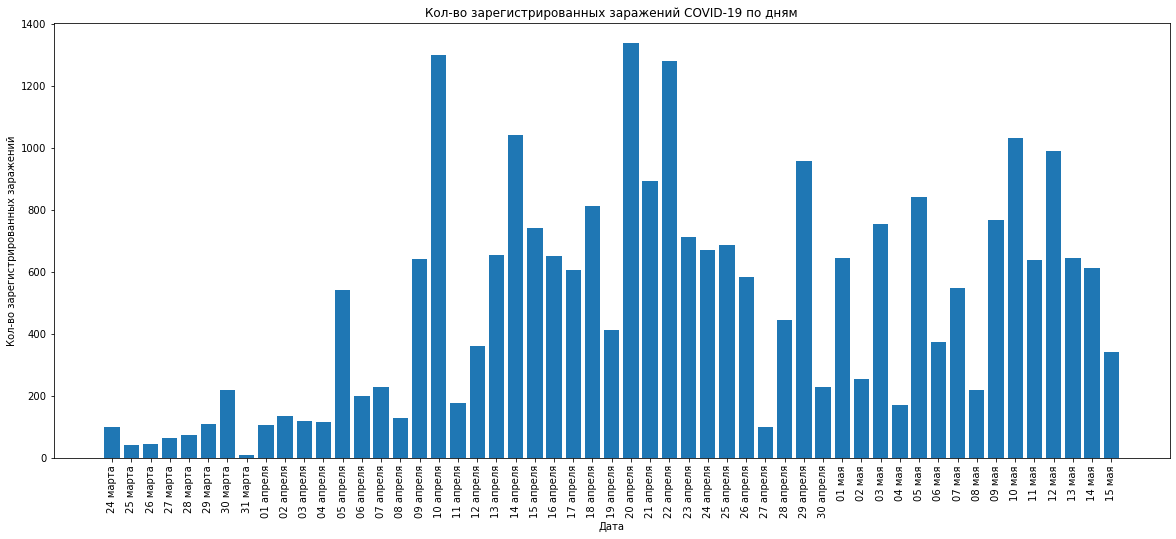

In [8]:
fig = plt.figure(figsize=(20, 8))
ax = plt.bar(x=data.date, height=y)
plt.xticks(rotation='vertical')
plt.ylabel('Кол-во зарегистрированных заражений')
plt.xlabel('Дата')
plt.title('Кол-во зарегистрированных заражений COVID-19 по дням')
plt.show()

Text(0.5, 1.0, 'Нормализованный график распределения')

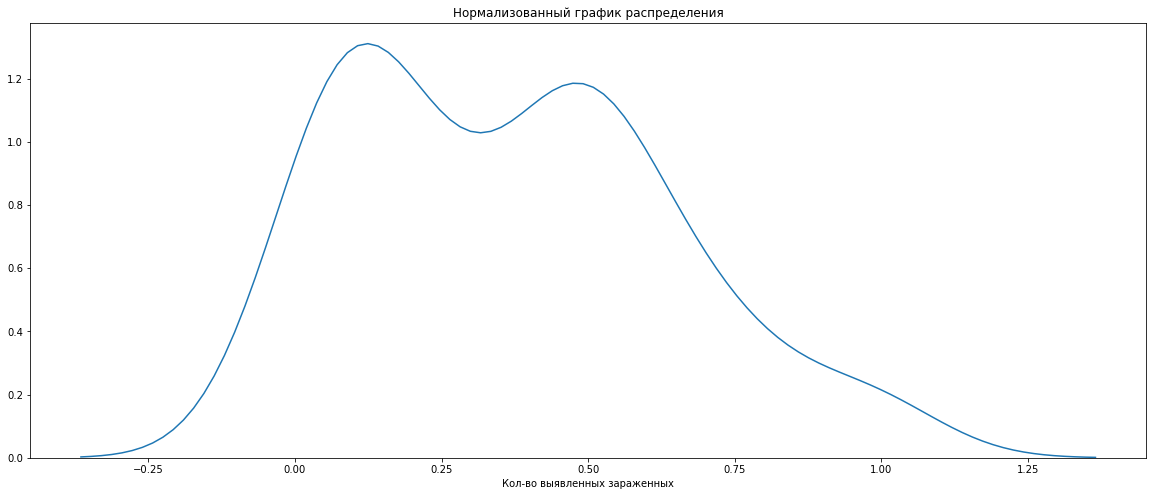

In [9]:
fig1 = plt.figure(figsize=(20, 8))
ax1 = sns.distplot((y-y.min())/(y.max()-y.min()), hist=False)
plt.xlabel('Кол-во выявленных зараженных')
plt.title('Нормализованный график распределения')

In [10]:
data.quantity

0       97
1       41
2       42
3       64
4       72
5      107
6      217
7        7
8      104
9      133
10     118
11     113
12     541
13     200
14     227
15     128
16     639
17    1297
18     175
19     360
20     654
21    1041
22     739
23     651
24     606
25     811
26     410
27    1336
28     892
29    1280
30     712
31     670
32     686
33     581
34     100
35     442
36     957
37     227
38     642
39     252
40     754
41     169
42     841
43     372
44     547
45     219
46     765
47    1030
48     637
49     988
50     644
51     611
52     339
Name: quantity, dtype: object

In [11]:
print('Итого по данным mash.ru в Москве и МО на 17 мая 2020года', data.quantity.sum(), 'заболевших')

Итого по данным mash.ru в Москве и МО на 17 мая 2020года 26287 заболевших


In [12]:
import requests
from bs4 import BeautifulSoup
import lxml

In [13]:
request = requests.get(r'https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/United_States_medical_cases')

In [14]:
soup = BeautifulSoup(request.text, 'lxml')

In [15]:
tbl = soup.find('table')

In [16]:
df_a = pd.read_html(str(tbl))[0]

In [17]:
df_a.head(5)

Date West                                                              \
     Date   AK   AZ   CA   CO   HI   ID   MT   NM   NV   OR   UT   WA   WY   
0  Jan 21  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1  NaN   
1  Jan 24  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  Jan 25  NaN  NaN    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  Jan 26  NaN    1    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  Jan 30  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

  Midwest                                                             South  \
       IA   IL   IN   KS   MI   MN   MO   ND   NE   OH   OK   SD   WI    AL   
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
1     NaN    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
4     NaN    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   

                                                              Northeast       \
    AR   FL   GA   KY   LA   MS   NC   SC   TN   TX   VA   WV        CT   DC   
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN   

                                                    Territories            \
    DE   MA   MD   ME   NH   NJ   NY   PA   RI   VT          GU   MP   PR   
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN   

          Date Confirmed     Deaths      Recovered       
    VI  Date.1       New Cml    New  Cml       New  Cml  
0  NaN  Jan 21         1   1    NaN  NaN       NaN  NaN  
1  NaN  Jan 24         1   2    NaN  NaN       NaN  NaN  
2  NaN  Jan 25         1   3    NaN  NaN       NaN  NaN  
3  NaN  Jan 26         2   5    NaN  NaN       NaN  NaN  
4  NaN  Jan 30         1   6    NaN  NaN       NaN  NaN

In [18]:
df_a = df_a[df_a.iloc[:,0] != 'Date']


In [19]:
col = []
for i in df_a.columns:
    col.append(i[1])

In [20]:
df_a.columns = col

In [21]:
df_a.tail()

,Date,AK,AZ,CA,CO,HI,ID,MT,NM,NV,OR,UT,WA,WY,IA,IL,IN,KS,MI,MN,MO,ND,NE,OH,OK,SD,WI,AL,AR,FL,GA,KY,LA,MS,NC,SC,TN,TX,VA,WV,CT,DC,DE,MA,MD,ME,NH,NJ,NY,PA,RI,VT,GU,MP,PR,VI,Date.1,New,Cml,New,Cml,New,Cml
101,State Sources,AK,AZ,CA,CO,HI,ID,MT,NM,NV,OR,UT,WA,WY,IA,IL,IN,KS,MI,MN,MO,ND,NE,OH,OK,SD,WI,AL,AR,FL,GA,KY,LA,MS,NC,SC,TN,TX,VA,WV,CT,DC,DE,MA,MD,ME,NH,NJ,NY,PA,RI,VT,GU,MP,PR,VI,State Sources,New,Cml,New,Cml,New,Cml
102,State Sources,West,West,West,West,West,West,West,West,West,West,West,West,West,Midwest,Midwest,Midwest,Midwest,Midwest,Midwest,Midwest,Midwest,Midwest,Midwest,Midwest,Midwest,Midwest,South,South,South,South,South,South,South,South,South,South,South,South,South,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Territories,Territories,Territories,Territories,State Sources,Confirmed,Confirmed,Deaths,Deaths,Recovered,Recovered
103,State Sources,[1],[2],[3][4],[5],[6][7],[8],[9][10],[11],[12][13],[14],[15][16],[17],[18][19],[20][21],[22],[23],[24],[25],[26],[27],[28],[29][30],[31],[32],[33],[34],[35],[36][37],[38],[39],[40],[41],[42],[43],[44],[45],[46][47],[48],[49],[50],[51],[52],[53],[54],[55],[56],[57][58],[59][60],[61][62],[63],[64],[65],[66],[67][68],[69],State Sources,NaN,NaN,NaN,NaN,[70],[70]
104,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of confi...,Notes: Numbers shown above as of date of c

In [22]:
df_ny = df_a[['Date', 'NY']]

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
df_ny
df_ny = df_ny.drop(df_ny.loc[range(100, 106), :].index, axis=0)

In [25]:
df_ny.fillna(0, inplace=True)

In [26]:
df_ny = df_ny.T

In [27]:
df_opt = df_ny.loc[:,41:97].T

In [28]:
len(df_opt)

53

In [29]:
len(data)

53

In [33]:
df_opt.index = [i for i in range(len(df_opt))]

In [32]:
df_merged = pd.concat([data, df_opt], axis=1, ignore_index=True)

In [37]:
df_merged.head()

,0,1,2,3
0,24 марта,97,Mar 24,4790
1,25 марта,41,Mar 25,5146
2,26 марта,42,Mar 26,6447
3,27 марта,64,Mar 27,7377
4,28 марта,72,Mar 28,7683


In [38]:
df_merged.index = df_merged.iloc[:,0]

In [39]:
df_merged.drop([0, 2], axis=1, inplace=True)

In [40]:
df_merged.columns=['Moscow', 'NY']

In [41]:
df_merged.Moscow = df_merged.Moscow.astype(float)
df_merged.NY = df_merged.NY.astype(float)

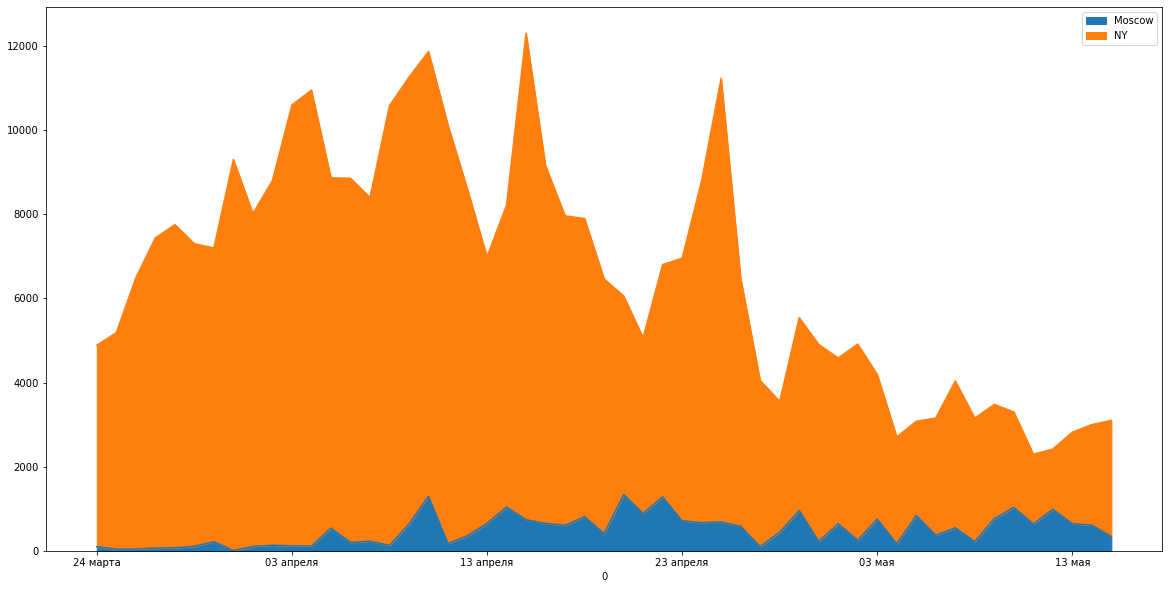

In [42]:
df_merged.plot.area(figsize=(20, 10))

In [43]:
df_normalized = df_merged
df_normalized.Moscow = [(i - df_normalized.Moscow.min())/(df_normalized.Moscow.max()-df_normalized.Moscow.min()) for i in df_normalized.Moscow]
df_normalized.NY = [(i - df_normalized.NY.min())/(df_normalized.NY.max()-df_normalized.NY.min()) for i in df_normalized.NY]

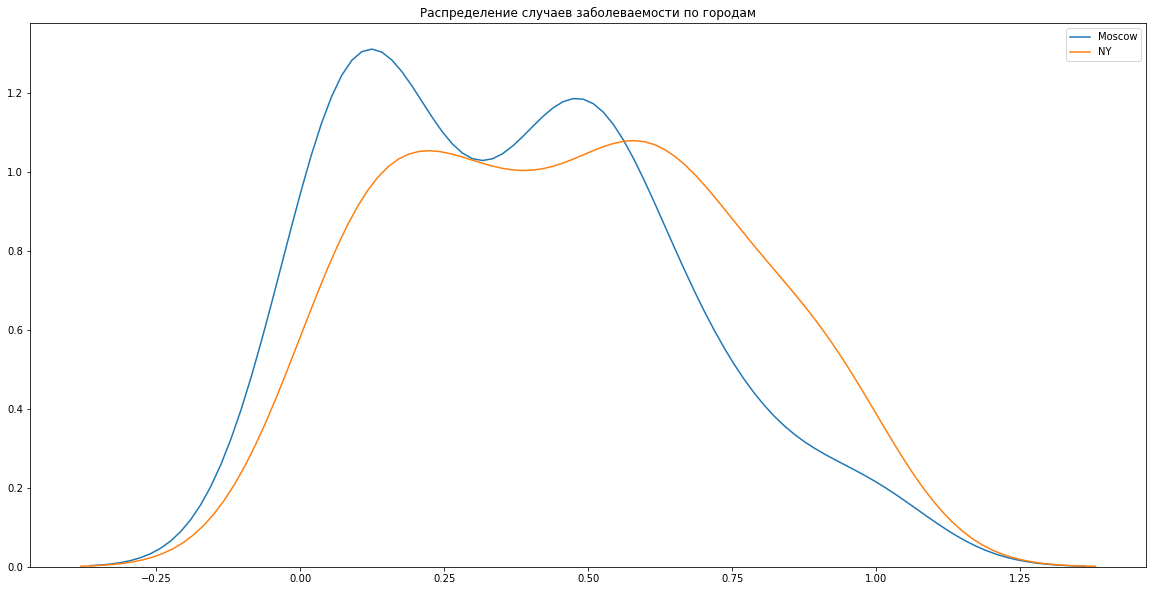

In [44]:
fig3 = plt.figure(figsize=(20,10))
axM = sns.distplot(df_normalized.Moscow, hist=False, label='Moscow')
axNY = sns.distplot(df_normalized.NY, hist=False, ax=axM, label='NY')
plt.xlabel('')
plt.title('Распределение случаев заболеваемости по городам')
plt.show()

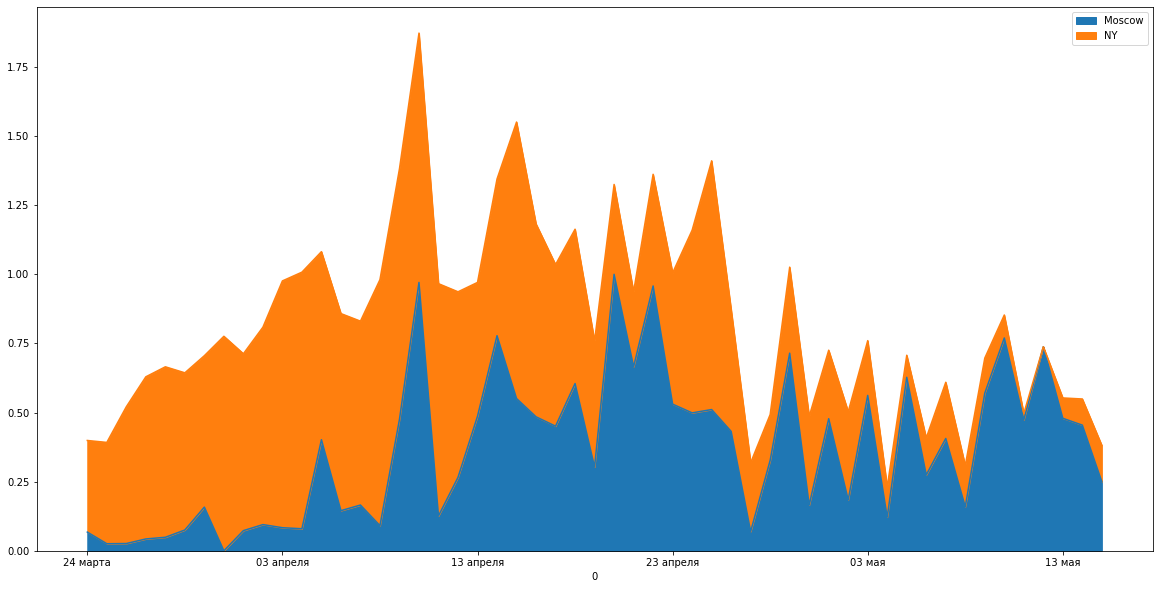

In [45]:
df_normalized.plot.area(figsize=(20, 10))